<a href="https://colab.research.google.com/github/nandinisitlani2/ML-Projects/blob/main/TextClassifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting data

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 9.53 MiB/s, done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [3]:
import os

filenames=[data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt']

In [4]:
def get_lines(filename):

 with open(filename,"r") as f:
  return f.readlines()

In [5]:
train_lines=get_lines(data_dir+"/train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [6]:
len(train_lines)

210040

In [7]:
def preprocess_text_with_line_numbers(filename):
  
  input_lines = get_lines(filename) 
  abstract_lines = "" 
  abstract_samples = [] 

  for line in input_lines:
    if line.startswith("###"): 
      abstract_id = line
      abstract_lines = "" 
    elif line.isspace(): 
      abstract_line_split = abstract_lines.splitlines() 

      
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} 
        target_text_split = abstract_line.split("\t") 
        line_data["target"] = target_text_split[0] 
        line_data["text"] = target_text_split[1].lower() 
        line_data["line_number"] = abstract_line_number 
        line_data["total_lines"] = len(abstract_line_split) - 1 
        abstract_samples.append(line_data) 
    
    else: 
      abstract_lines += line
  
  return abstract_samples







In [8]:
train_samples=preprocess_text_with_line_numbers("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"/test.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"/dev.txt")

In [9]:
import pandas as pd 
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [10]:
train_sentences=train_df["text"].to_list()
test_sentences=test_df["text"].to_list()
val_sentences=val_df["text"].to_list()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [11]:
val_sentences[:10]

['ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
 'it is not clear whether these patients would benefit from antifungal treatment .',
 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
 'primary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .',
 'sixty-five patients were randomized .',
 'fifty-nine patients started treatment ( @ receiving voriconazole and @ receiving plac

### Making numeric labels

In [12]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
train_labels_one_hot.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(180040, 5)

## Label encoded labels

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

train_labels_encoded=label_encoder.fit_transform(train_df["target"].to_numpy())
test_labels_encoded=label_encoder.fit_transform(test_df["target"].to_numpy())
val_labels_encoded=label_encoder.fit_transform(val_df["target"].to_numpy())

In [14]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

## Trying baseline model

In [15]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])


model_0.fit(X=train_sentences, 
            y=train_labels_encoded);

In [16]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [17]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [18]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-18 18:07:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-18 18:07:09 (80.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
 

  model_accuracy = accuracy_score(y_true, y_pred) * 100

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [20]:
baseline_results=calculate_results(y_true=val_labels_encoded,
                y_pred=baseline_preds)

In [21]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers 


In [23]:
sent_len=[len(sentence.split()) for sentence in train_sentences]

avg_sent=np.mean(sent_len)


In [24]:
avg_sent

26.338269273494777

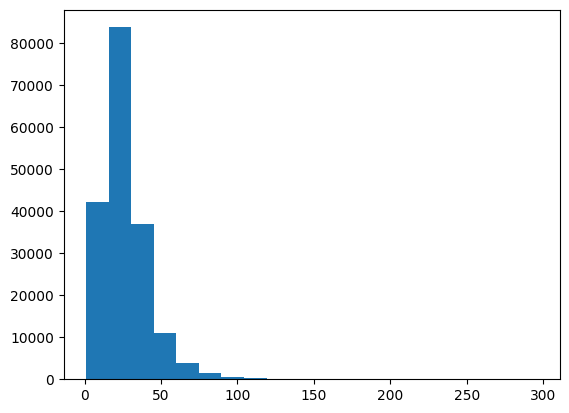

In [25]:
import matplotlib.pyplot as plt
plt.hist(sent_len,bins=20);

## Text vectorizer layer

In [26]:
max_tokens=68000
# taken from the paper 


output_seq_len=55

In [27]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [28]:
text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  output_sequence_length=output_seq_len)

In [29]:
text_vectorizer.adapt(train_sentences)

In [30]:
import random
target_sentence=random.choice(train_sentences)
print(target_sentence)
print(len(target_sentence.split()))
print(text_vectorizer(target_sentence))

there was a significant group time interaction ( p < @ ) in postintervention body weight , with both the powers and powers ( plus ) groups demonstrating greater reduction in body weight compared with the control group ( powers : -@ @ kg , -@ -@ % ; powers ( plus ) : -@ @ kg , -@ @ % ; control : +@ @ kg , @ @ % ) .
73
tf.Tensor(
[  61   10    8   37   13   63  605   14    5 1229  239  174    7   54
    2 9885    3 9885  231   24 3124  182  169    5  239  174   34    7
    2   35   13 9885  510 9885  231  510   35  510    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0], shape=(55,), dtype=int64)


In [31]:
text_vocab=text_vectorizer.get_vocabulary()

print(f"lenght is :{len(text_vocab)}")
print(f"most used word :{text_vocab[:5]}")
print(f"least used word :{text_vocab[-5:]}")

lenght is :64841
most used word :['', '[UNK]', 'the', 'and', 'of']
least used word :['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [32]:
token_embedding=layers.Embedding(input_dim=len(text_vocab),
                                 output_dim=128,
                                 mask_zero=True,
                                 name="token_embedding")


In [33]:
print(f"sentence before verctorization:{target_sentence}")
print(f"sentence after verctorization:{text_vectorizer(target_sentence)}")
print(f"sentence after embedding:{token_embedding(text_vectorizer(target_sentence))}")

sentence before verctorization:there was a significant group time interaction ( p < @ ) in postintervention body weight , with both the powers and powers ( plus ) groups demonstrating greater reduction in body weight compared with the control group ( powers : -@ @ kg , -@ -@ % ; powers ( plus ) : -@ @ kg , -@ @ % ; control : +@ @ kg , @ @ % ) .
sentence after verctorization:[  61   10    8   37   13   63  605   14    5 1229  239  174    7   54
    2 9885    3 9885  231   24 3124  182  169    5  239  174   34    7
    2   35   13 9885  510 9885  231  510   35  510    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
sentence after embedding:[[-0.03025938  0.01341176  0.03403369 ... -0.04249355  0.02777604
   0.00857993]
 [-0.00025206  0.010216    0.02633662 ...  0.04631975 -0.01260862
  -0.03749499]
 [ 0.03475442  0.04294516  0.01727476 ...  0.04055209 -0.00628031
   0.0341838 ]
 ...
 [-0.0296046  -0.01801454  0.01581491 ...  0.04425539  0.02627686
  -0

In [34]:
token_embedding(text_vectorizer(target_sentence)).shape

TensorShape([55, 128])

### Creating datasets


In [35]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))

In [36]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Model_1 :conv 1d 

In [37]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vector=text_vectorizer(inputs)
embedded_text=token_embedding(text_vector)

x=layers.Conv1D(64,kernel_size=5,activation="relu",padding="same")(embedded_text)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(5,activation="softmax")(x)

model_1=tf.keras.Model(inputs,outputs)


model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [38]:
history_model_1=model_1.fit(train_dataset,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            epochs=3,
                            validation_data=val_dataset,
                            validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 48s 69ms/step - loss: 0.9096 - accuracy: 0.6400 - val_loss: 0.6838 - val_accuracy: 0.7397
Epoch 2/3
562/562 [==============================] - 11s 19ms/step - loss: 0.6583 - accuracy: 0.7560 - val_loss: 0.6317 - val_accuracy: 0.7699
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6192 - accuracy: 0.7722 - val_loss: 0.5979 - val_accuracy: 0.7866


In [39]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.6003 - accuracy: 0.7857


[0.6002699136734009, 0.7856811881065369]

In [40]:
model_1_pred_probs=model_1.predict(val_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[4.2139426e-01, 1.9504946e-01, 7.3914021e-02, 2.8227025e-01,
        2.7372004e-02],
       [4.7845855e-01, 2.6530111e-01, 1.3448712e-02, 2.3586522e-01,
        6.9264127e-03],
       [1.5384769e-01, 4.8354603e-03, 1.9549113e-03, 8.3932400e-01,
        3.7875983e-05],
       ...,
       [4.3184868e-06, 7.3886843e-04, 7.0929911e-04, 3.3059241e-06,
        9.9854422e-01],
       [4.9777541e-02, 5.2503812e-01, 8.4059298e-02, 5.9963234e-02,
        2.8116181e-01],
       [1.6308016e-01, 6.9176036e-01, 4.3985486e-02, 4.6098430e-02,
        5.5075496e-02]], dtype=float32)

In [41]:
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [42]:
model_1_results=calculate_results(y_true=val_labels_encoded,
                y_pred=model_1_preds)

In [43]:
model_1_results

{'accuracy': 78.5681186283596,
 'precision': 0.7828113041871587,
 'recall': 0.785681186283596,
 'f1': 0.7831909191622154}

## MODEL_2_Feature extraction with pretrained embedding

In [44]:
import tensorflow_hub as hub

tf_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                              trainable=False,
                              name="universal_sentence_encoder")

In [45]:
inputs=layers.Input(shape=(),dtype=tf.string)
pretrained_embedding=tf_embedding_layer(inputs)
x=layers.Dense(128,activation="relu")(pretrained_embedding)
outputs=layers.Dense(5,activation="softmax")(x)
model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [46]:
histpry_model_2=model_2.fit(train_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=val_dataset,
                            validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 15ms/step - loss: 0.9115 - accuracy: 0.6535 - val_loss: 0.7930 - val_accuracy: 0.6872
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7666 - accuracy: 0.7021 - val_loss: 0.7515 - val_accuracy: 0.7055
Epoch 3/3
562/562 [==============================] - 9s 15ms/step - loss: 0.7501 - accuracy: 0.7117 - val_loss: 0.7371 - val_accuracy: 0.7124


In [47]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7396 - accuracy: 0.7145


[0.7396246194839478, 0.7144511938095093]

In [48]:
model_2_pred_probs=model_2.predict(test_dataset)

942/942 [==============================] - 10s 11ms/step


In [49]:
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)

In [50]:
model_2_results=calculate_results(y_true=test_labels_encoded,
                                  y_pred=model_2_preds)
model_2_results

{'accuracy': 70.8478513356562,
 'precision': 0.7107878293089503,
 'recall': 0.7084785133565621,
 'f1': 0.7060346368231317}

## Model 3 with character embedding

In [51]:
def split_chars(text):
  return " ".join(list(text))


train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [52]:
len(train_chars)
len(train_sentences)

180040

In [53]:
char_lens=[len(sentence) for sentence in train_sentences]
avg_len=np.mean(char_lens)
avg_len

149.3662574983337

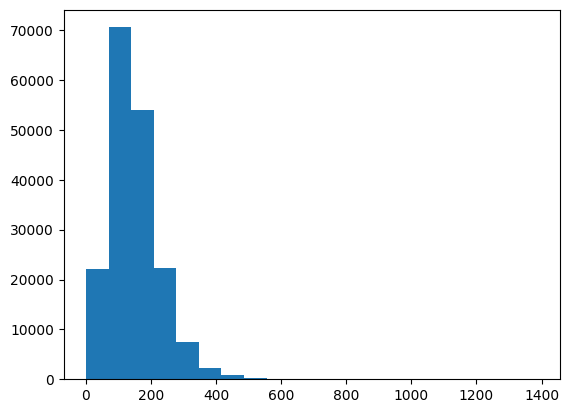

In [54]:
import matplotlib.pyplot as plt

plt.hist(char_lens,bins=20);

In [55]:
output_sequence_char_len=int(np.percentile(char_lens,95))
output_sequence_char_len

290

In [56]:
import string
alphabet=string.ascii_lowercase + string.digits +string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
NUM_CHAR_TOKENS = len(alphabet) + 2 
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_sequence_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")


char_vectorizer.adapt(train_chars)

In [58]:
char_vocab=char_vectorizer.get_vocabulary()
print(f"length is :{len(char_vocab)}")
print(f"most used character:{char_vocab[:5]}")
print(f"least used character:{char_vocab[-5:]}")

length is :28
most used character:['', '[UNK]', 'e', 't', 'i']
least used character:['k', 'x', 'z', 'q', 'j']


In [59]:

random_char=random.choice(train_chars)
char_vectorizer(random_char)

<tf.Tensor: shape=(290,), dtype=int64, numpy=
array([ 5,  3,  3, 13,  2, 22,  2, 18,  4,  6,  6,  4,  6, 18,  7, 17,  3,
       13,  2, 20,  2,  5,  6,  4,  6, 18,  7, 17, 21,  2,  6,  3,  4, 12,
        5,  3,  4,  7,  6, 14,  5,  3,  4,  2,  6,  3,  9, 20,  2,  8,  2,
        8,  5,  6, 10,  7, 15, 12, 19,  5,  9,  9,  4, 18,  6,  2, 10,  3,
        7,  2,  4,  3, 13,  2,  8,  7, 17,  3, 13,  2, 17,  7, 12, 12,  7,
       20,  4,  6, 18, 18,  8,  7, 16, 14,  9,  7,  3,  7,  8, 13, 17,  6,
       11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

## Creating chararcter level embedding

In [96]:
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, 
                              output_dim=25, 
                              mask_zero=False, 
                              name="char_embed")


In [61]:
char_embed(char_vectorizer(random_char))
print(random_char)
char_embed(char_vectorizer(random_char))

a t   t h e   b e g i n n i n g   o f   t h e   w e a n i n g   o f   v e n t i l a t i o n   ,   p a t i e n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   e i t h e r   o f   t h e   f o l l o w i n g   g r o u p s   :   o t   o r   h f n c   .


<tf.Tensor: shape=(290, 25), dtype=float32, numpy=
array([[-0.02333376,  0.03675767, -0.04208517, ..., -0.01576614,
         0.03446945,  0.02976862],
       [-0.00063672, -0.0277178 , -0.03708923, ...,  0.003551  ,
         0.01331357,  0.02754643],
       [-0.00063672, -0.0277178 , -0.03708923, ...,  0.003551  ,
         0.01331357,  0.02754643],
       ...,
       [ 0.03394883, -0.01918285, -0.0294384 , ..., -0.007113  ,
        -0.00527985, -0.00033082],
       [ 0.03394883, -0.01918285, -0.0294384 , ..., -0.007113  ,
        -0.00527985, -0.00033082],
       [ 0.03394883, -0.01918285, -0.0294384 , ..., -0.007113  ,
        -0.00527985, -0.00033082]], dtype=float32)>

In [62]:
random_train_chars = random.choice(train_chars)
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")
     

Charified text (before vectorization and embedding):
p a t i e n t s   i n   t h e   c o n t r o l   i n t e r v e n t i o n   p r a c t i c e d   t h e   s a m e   d a i l y   t a s k s   w i t h   a   t h e r a p i s t   ' s   d e m o n s t r a t i o n   a n d   g u i d a n c e   .

Embedded chars (after vectorization and embedding):
[[[ 0.0375852  -0.00596038  0.04447022 ... -0.02915576 -0.02686049
    0.03674797]
  [-0.02333376  0.03675767 -0.04208517 ... -0.01576614  0.03446945
    0.02976862]
  [-0.00063672 -0.0277178  -0.03708923 ...  0.003551    0.01331357
    0.02754643]
  ...
  [ 0.03394883 -0.01918285 -0.0294384  ... -0.007113   -0.00527985
   -0.00033082]
  [ 0.03394883 -0.01918285 -0.0294384  ... -0.007113   -0.00527985
   -0.00033082]
  [ 0.03394883 -0.01918285 -0.0294384  ... -0.007113   -0.00527985
   -0.00033082]]]

Character embedding shape: (1, 290, 25)


## conv1d model on char_embedding

In [63]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
char_vector=char_vectorizer(inputs)
char_embed=char_embed(char_vector)

x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embed)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(5,activation="softmax")(x)

model_3=tf.keras.Model(inputs,outputs)

model_3.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [64]:
## optimizing inputs


train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [65]:
model_3.fit(train_char_dataset,
            epochs=3,
            steps_per_epoch=int(0.1*len(train_char_dataset)),
            validation_data=val_char_dataset,
            validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 1.2713 - accuracy: 0.4825 - val_loss: 1.0396 - val_accuracy: 0.6014
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0044 - accuracy: 0.5990 - val_loss: 0.9476 - val_accuracy: 0.6300
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.9255 - accuracy: 0.6398 - val_loss: 0.8742 - val_accuracy: 0.6619


In [66]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.8924 - accuracy: 0.6542


[0.8923577070236206, 0.6541771292686462]

In [67]:
model_3_pred_probs=model_3.predict(val_char_dataset)

945/945 [==============================] - 3s 3ms/step


In [68]:
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)

In [69]:
model_3_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_3_preds)
model_3_results

{'accuracy': 65.41771481530517,
 'precision': 0.6545830593524017,
 'recall': 0.6541771481530517,
 'f1': 0.6474961271121503}

### MODEL 4 Combining 2 models (pre-trained token + char embedding)

In [72]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)


char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)


token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])


combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5, activation="softmax")(final_dropout)


model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [73]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

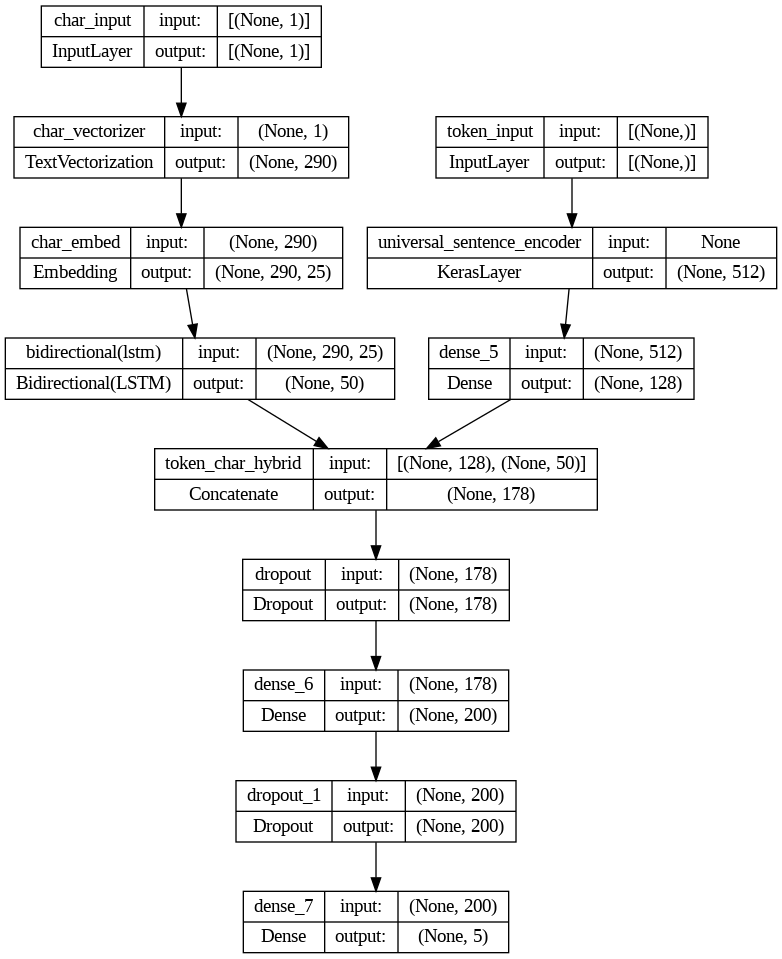

In [74]:
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [75]:
model_4.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [76]:

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels


train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 


val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
     

In [77]:
model_4_history = model_4.fit(train_char_token_dataset, 
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))
     

Epoch 1/3
5627/5627 [==============================] - 238s 41ms/step - loss: 0.7609 - accuracy: 0.7076 - val_loss: 0.6276 - val_accuracy: 0.7610
Epoch 2/3
5627/5627 [==============================] - 236s 42ms/step - loss: 0.6785 - accuracy: 0.7434 - val_loss: 0.6052 - val_accuracy: 0.7749
Epoch 3/3
5627/5627 [==============================] - 238s 42ms/step - loss: 0.6578 - accuracy: 0.7516 - val_loss: 0.5861 - val_accuracy: 0.7803


In [78]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [79]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.5899 - accuracy: 0.7766


[0.5899243354797363, 0.7766450643539429]

In [80]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)

945/945 [==============================] - 19s 19ms/step


In [81]:
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)

In [82]:
model_4_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_4_preds)

In [83]:
model_4_results

{'accuracy': 77.66450417052828,
 'precision': 0.7747461459862042,
 'recall': 0.7766450417052827,
 'f1': 0.7725081274498673}

## Creating positional embedding(line_numbers)

<Axes: ylabel='Frequency'>

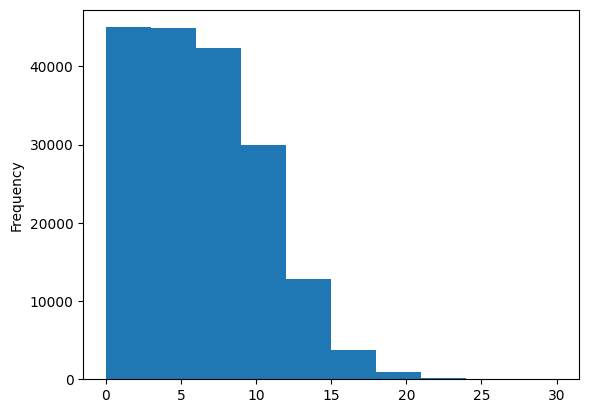

In [84]:
train_df.line_number.plot.hist()

In [85]:
train_line_no_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=15)# most abstarcts are covered till  line no 15 
test_line_no_one_hot=tf.one_hot(test_df["line_number"].to_numpy(),depth=15)# most abstarcts are covered till  line no 15 
val_line_no_one_hot=tf.one_hot(val_df["line_number"].to_numpy(),depth=15)# most abstarcts are covered till  line no 15 

In [86]:
train_line_no_one_hot.shape

TensorShape([180040, 15])

In [87]:
train_line_no_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

<Axes: ylabel='Frequency'>

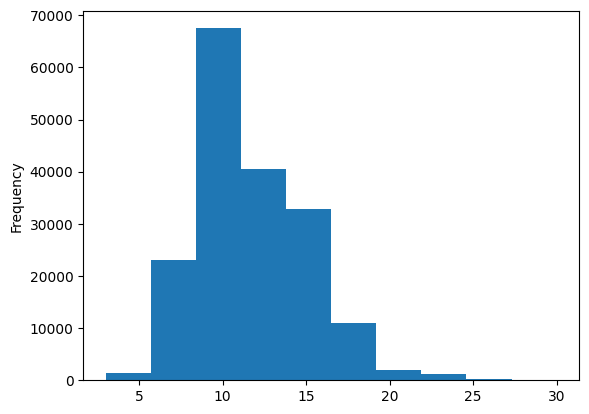

In [88]:
train_df.total_lines.plot.hist()

In [89]:
np.percentile(train_df.total_lines,98)

20.0

In [90]:
train_total_one_hot=tf.one_hot(train_df["total_lines"].to_numpy(),depth=20)
test_total_one_hot=tf.one_hot(test_df["total_lines"].to_numpy(),depth=20)
val_total_one_hot=tf.one_hot(val_df["total_lines"].to_numpy(),depth=20)

In [91]:
train_total_one_hot[:10],train_total_one_hot.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

## tribrid embedding model

In [97]:
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)


char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)


combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, 
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

 #Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])


output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)


model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer)
     

In [98]:
model_5.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']    

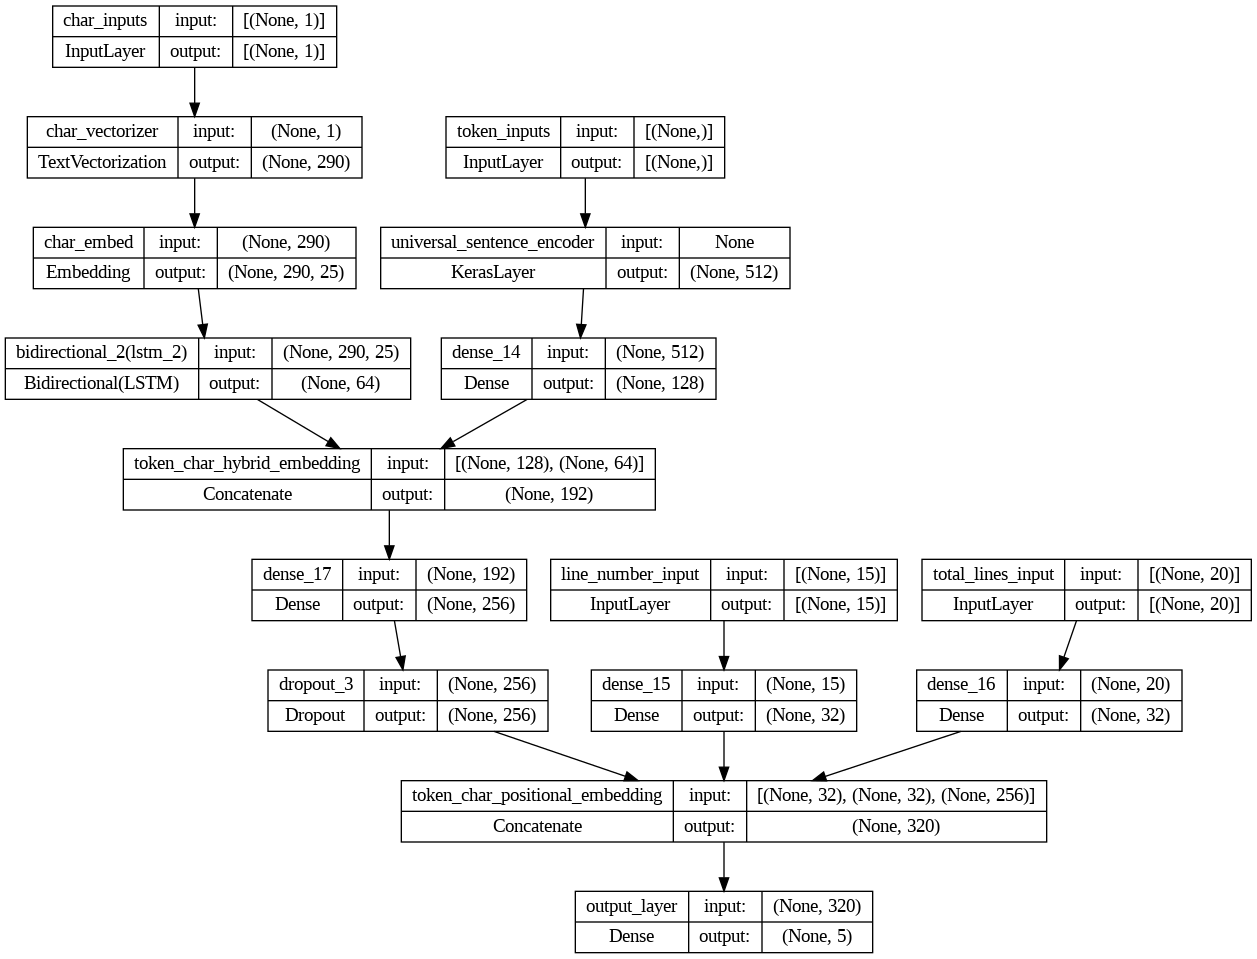

In [99]:
plot_model(model_5,show_shapes=True)

In [101]:
## applying label soothing while compiling


model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer="adam",
                metrics=["accuracy"])

## MODEL 5 tribrid embedding dataset

In [102]:
train_tribrid_data=tf.data.Dataset.from_tensor_slices((train_line_no_one_hot,
                                                       train_total_one_hot,
                                                       train_sentences,
                                                       train_chars))

train_tribrid_label=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)

train_tribrid_dataset=tf.data.Dataset.zip((train_tribrid_data,train_tribrid_label))

train_tribrid_dataset=train_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_tribrid_data=tf.data.Dataset.from_tensor_slices((val_line_no_one_hot,
                                                       val_total_one_hot,
                                                       val_sentences,
                                                       val_chars))

val_tribrid_label=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)

val_tribrid_dataset=tf.data.Dataset.zip((val_tribrid_data,val_tribrid_label))

val_tribrid_dataset=val_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [103]:
train_tribrid_dataset,val_tribrid_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [105]:
model_5_history=model_5.fit(train_tribrid_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_tribrid_dataset)),
                            validation_data=val_tribrid_dataset,
                            validation_steps=int(0.1*len(val_tribrid_dataset)))

Epoch 1/3
562/562 [==============================] - 46s 67ms/step - loss: 1.0992 - accuracy: 0.7213 - val_loss: 0.9907 - val_accuracy: 0.7992
Epoch 2/3
562/562 [==============================] - 37s 66ms/step - loss: 0.9711 - accuracy: 0.8112 - val_loss: 0.9560 - val_accuracy: 0.8251
Epoch 3/3
562/562 [==============================] - 37s 65ms/step - loss: 0.9535 - accuracy: 0.8202 - val_loss: 0.9428 - val_accuracy: 0.8245


In [106]:
model_5.evaluate(val_tribrid_dataset)

945/945 [==============================] - 26s 27ms/step - loss: 0.9406 - accuracy: 0.8276


[0.9405784606933594, 0.8275850415229797]

In [108]:
model_5_pred_probs=model_5.predict(val_tribrid_dataset)

945/945 [==============================] - 26s 26ms/step


In [109]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)

In [113]:
model_5_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_5_preds)

In [115]:
model_5_results

{'accuracy': 82.75850655368727,
 'precision': 0.8263988123112775,
 'recall': 0.8275850655368727,
 'f1': 0.8267655915385471}

## COMPARING MODEL RESULTS

In [117]:
all_model_results=pd.DataFrame({"baseline":baseline_results,
                               "model_1_reults":model_1_results,
                               "model_2_reults":model_2_results,
                               "model_3_reults":model_3_results,
                               "model_4_reults":model_4_results,
                               "model_5_reults":model_5_results,})

In [118]:
all_model_results=all_model_results.transpose()

In [119]:
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
model_1_reults,78.568119,0.782811,0.785681,0.783191
model_2_reults,70.847851,0.710788,0.708479,0.706035
model_3_reults,65.417715,0.654583,0.654177,0.647496
model_4_reults,77.664504,0.774746,0.776645,0.772508
model_5_reults,82.758507,0.826399,0.827585,0.826766


In [120]:
all_model_results["accuracy"]=all_model_results["accuracy"]/100

<Axes: >

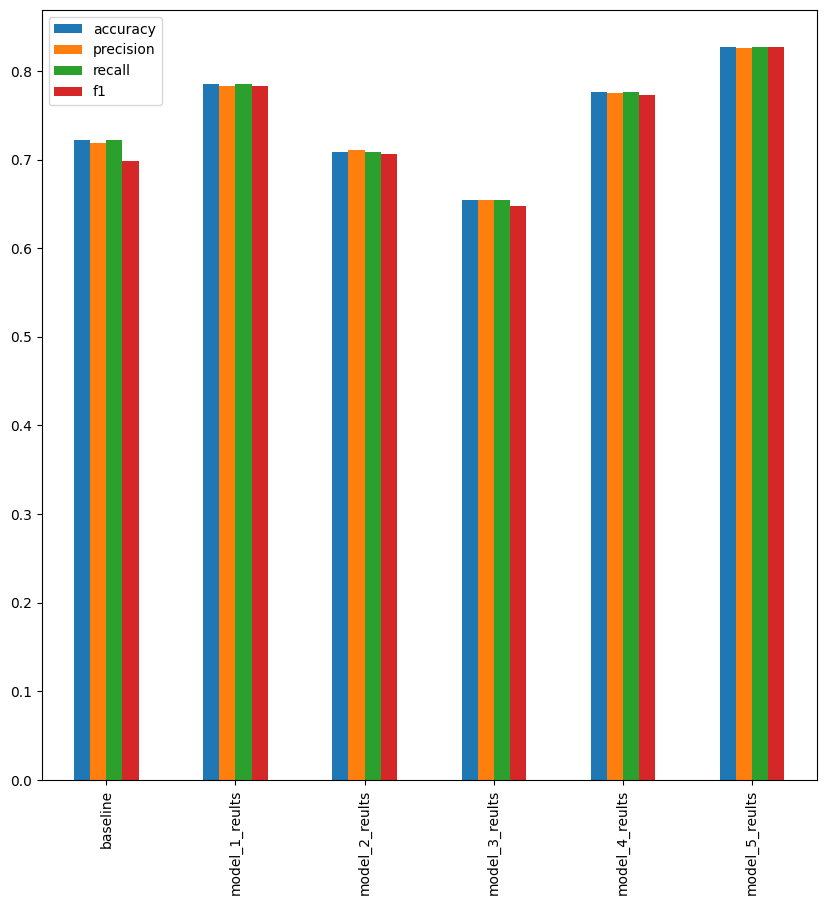

In [121]:
all_model_results.plot(kind="bar",figsize=(10,10))

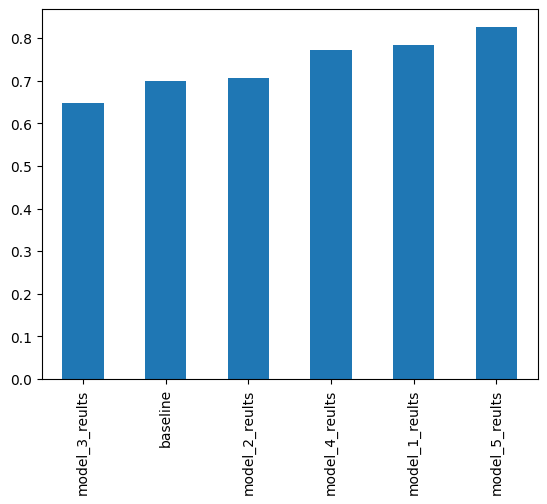

In [123]:
all_model_results.sort_values("f1",ascending=True)["f1"].plot(kind="bar");

### saving and loading model

In [125]:
model_5.save("skimlit")

In [126]:
loaded_model=tf.keras.models.load_model("skimlit")

In [127]:
loaded_model_pred_probs=loaded_model.predict(val_tribrid_dataset)

945/945 [==============================] - 32s 31ms/step


In [128]:
loaded_model_preds=tf.argmax(loaded_model_pred_probs,axis=1)

In [130]:
loaded_results=calculate_results(y_true=val_labels_encoded,
                                 y_pred=loaded_model_preds)

In [131]:
loaded_results

{'accuracy': 82.75850655368727,
 'precision': 0.8263988123112775,
 'recall': 0.8275850655368727,
 'f1': 0.8267655915385471}

In [133]:
loaded_results==model_5_results

True